In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import gc
%matplotlib inline

In [2]:
detailed_class_info_path = '../data/stage_1_detailed_class_info.csv'
train_labels_path = '../data/stage_1_train_labels.csv'

In [3]:
def load_csv(detailed_class_info_path, train_labels_path):
    detailed_class_info = pd.read_csv(detailed_class_info_path)
    train_labels = pd.read_csv(train_labels_path)
    return detailed_class_info,train_labels

In [4]:
# Load csv data
detailed_class_info,train_labels = load_csv(detailed_class_info_path,train_labels_path)

In [5]:
# Merge csv dataframes
df = pd.merge(left = detailed_class_info, right = train_labels, how = 'left', on = 'patientId')

del detailed_class_info, train_labels
gc.collect()

df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35875 entries, 0 to 35874
Data columns (total 7 columns):
patientId    35875 non-null object
class        35875 non-null object
x            15850 non-null float64
y            15850 non-null float64
width        15850 non-null float64
height       15850 non-null float64
Target       35875 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.2+ MB


In [6]:
df.head()

patientId                         class      x  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal    NaN   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal    NaN   
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal    NaN   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal    NaN   
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity  264.0   

       y  width  height  Target  
0    NaN    NaN     NaN       0  
1    NaN    NaN     NaN       0  
2    NaN    NaN     NaN       0  
3    NaN    NaN     NaN       0  
4  152.0  213.0   379.0       1

In [7]:
# drop duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28989 entries, 0 to 35874
Data columns (total 7 columns):
patientId    28989 non-null object
class        28989 non-null object
x            8964 non-null float64
y            8964 non-null float64
width        8964 non-null float64
height       8964 non-null float64
Target       28989 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [8]:
# Number of occurences of each patient id
df['patientId'].value_counts().head(10)

31764d54-ea3b-434f-bae2-8c579ed13799    4
32408669-c137-4e8d-bd62-fe8345b40e73    4
3239951b-6211-4290-b237-3d9ad17176db    4
0ab261f9-4eb5-42ab-a9a5-e918904d6356    4
7d674c82-5501-4730-92c5-d241fd6911e7    4
ee820aa5-4804-4984-97b3-f0a71d69702f    4
76f71a93-8105-4c79-a010-0cfa86f0061a    4
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    4
1bf08f3b-a273-4f51-bafa-b55ada2c23b5    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
Name: patientId, dtype: int64

In [9]:
# Distribution of number of occurences
df['patientId'].value_counts().value_counts()

1    22506
2     3062
3      105
4       11
Name: patientId, dtype: int64

In [10]:
# Non pneumonic cases
df[df['Target'] == 0]['patientId'].value_counts().value_counts()

1    20025
Name: patientId, dtype: int64

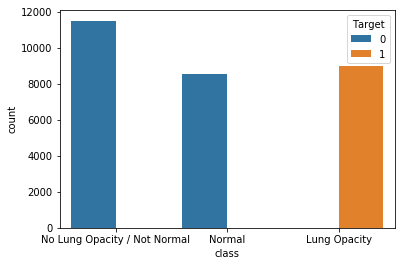

In [11]:
# Note: Only cases with lung opacity are pneumonic. So class='Lung Opacity'<==>target=1
sns.countplot(x='class',hue='Target',data=df);

Frequency of classes

In [12]:
df[df['class'] == 'Lung Opacity']['Target'].value_counts(dropna = False)

1    8964
Name: Target, dtype: int64

In [13]:
df[df['class'] == 'No Lung Opacity / Not Normal']['Target'].value_counts(dropna = False)

0    11500
Name: Target, dtype: int64

In [14]:
df[df['class'] == 'Normal']['Target'].value_counts(dropna = False)

0    8525
Name: Target, dtype: int64

Spatial data

In [15]:
df_areas = df.dropna()[['x', 'y', 'width', 'height']].copy()
df_areas['x_2'] = df_areas['x'] + df_areas['width']
df_areas['y_2'] = df_areas['y'] + df_areas['height']
df_areas['x_center'] = df_areas['x'] + df_areas['width'] / 2
df_areas['y_center'] = df_areas['y'] + df_areas['height'] / 2
df_areas['area'] = df_areas['width'] * df_areas['height']

df_areas.head()

x      y  width  height    x_2    y_2  x_center  y_center      area
4   264.0  152.0  213.0   379.0  477.0  531.0     370.5     341.5   80727.0
5   562.0  152.0  256.0   453.0  818.0  605.0     690.0     378.5  115968.0
10  323.0  577.0  160.0   104.0  483.0  681.0     403.0     629.0   16640.0
11  695.0  575.0  162.0   137.0  857.0  712.0     776.0     643.5   22194.0
18  288.0  322.0   94.0   135.0  382.0  457.0     335.0     389.5   12690.0

To check correlations of added spatial features

/home/ajays/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ajays/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ajays/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


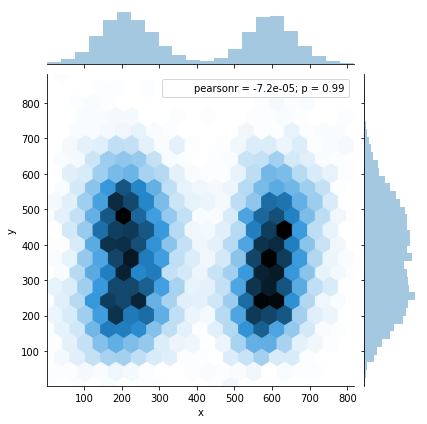

In [16]:
sns.jointplot(x = 'x', y = 'y', data = df_areas, kind = 'hex', gridsize = 20);

/home/ajays/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ajays/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ajays/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


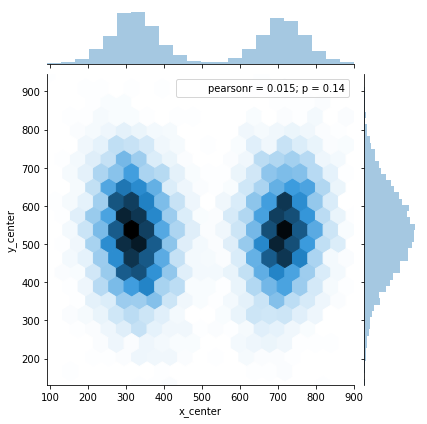

In [17]:
sns.jointplot(x = 'x_center', y = 'y_center', data = df_areas, kind = 'hex', gridsize = 20);

/home/ajays/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ajays/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ajays/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


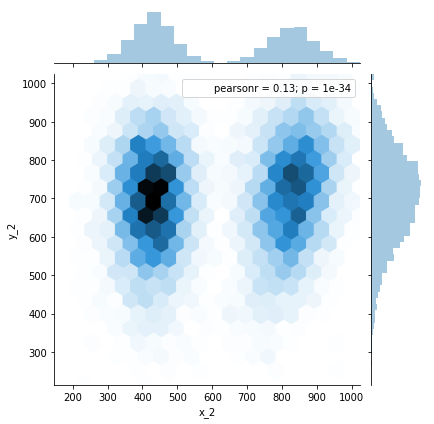

In [18]:
sns.jointplot(x = 'x_2', y = 'y_2', data = df_areas, kind = 'hex', gridsize = 20);

/home/ajays/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ajays/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ajays/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


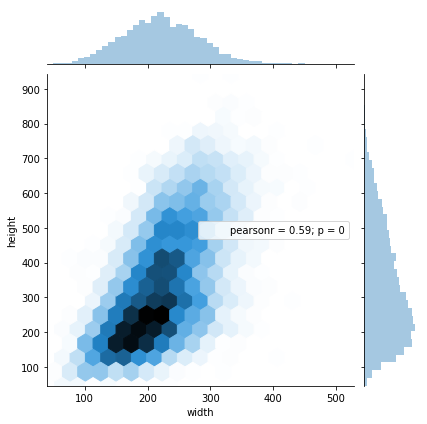

In [19]:
sns.jointplot(x = 'width', y = 'height', data = df_areas, kind = 'hex', gridsize = 20);

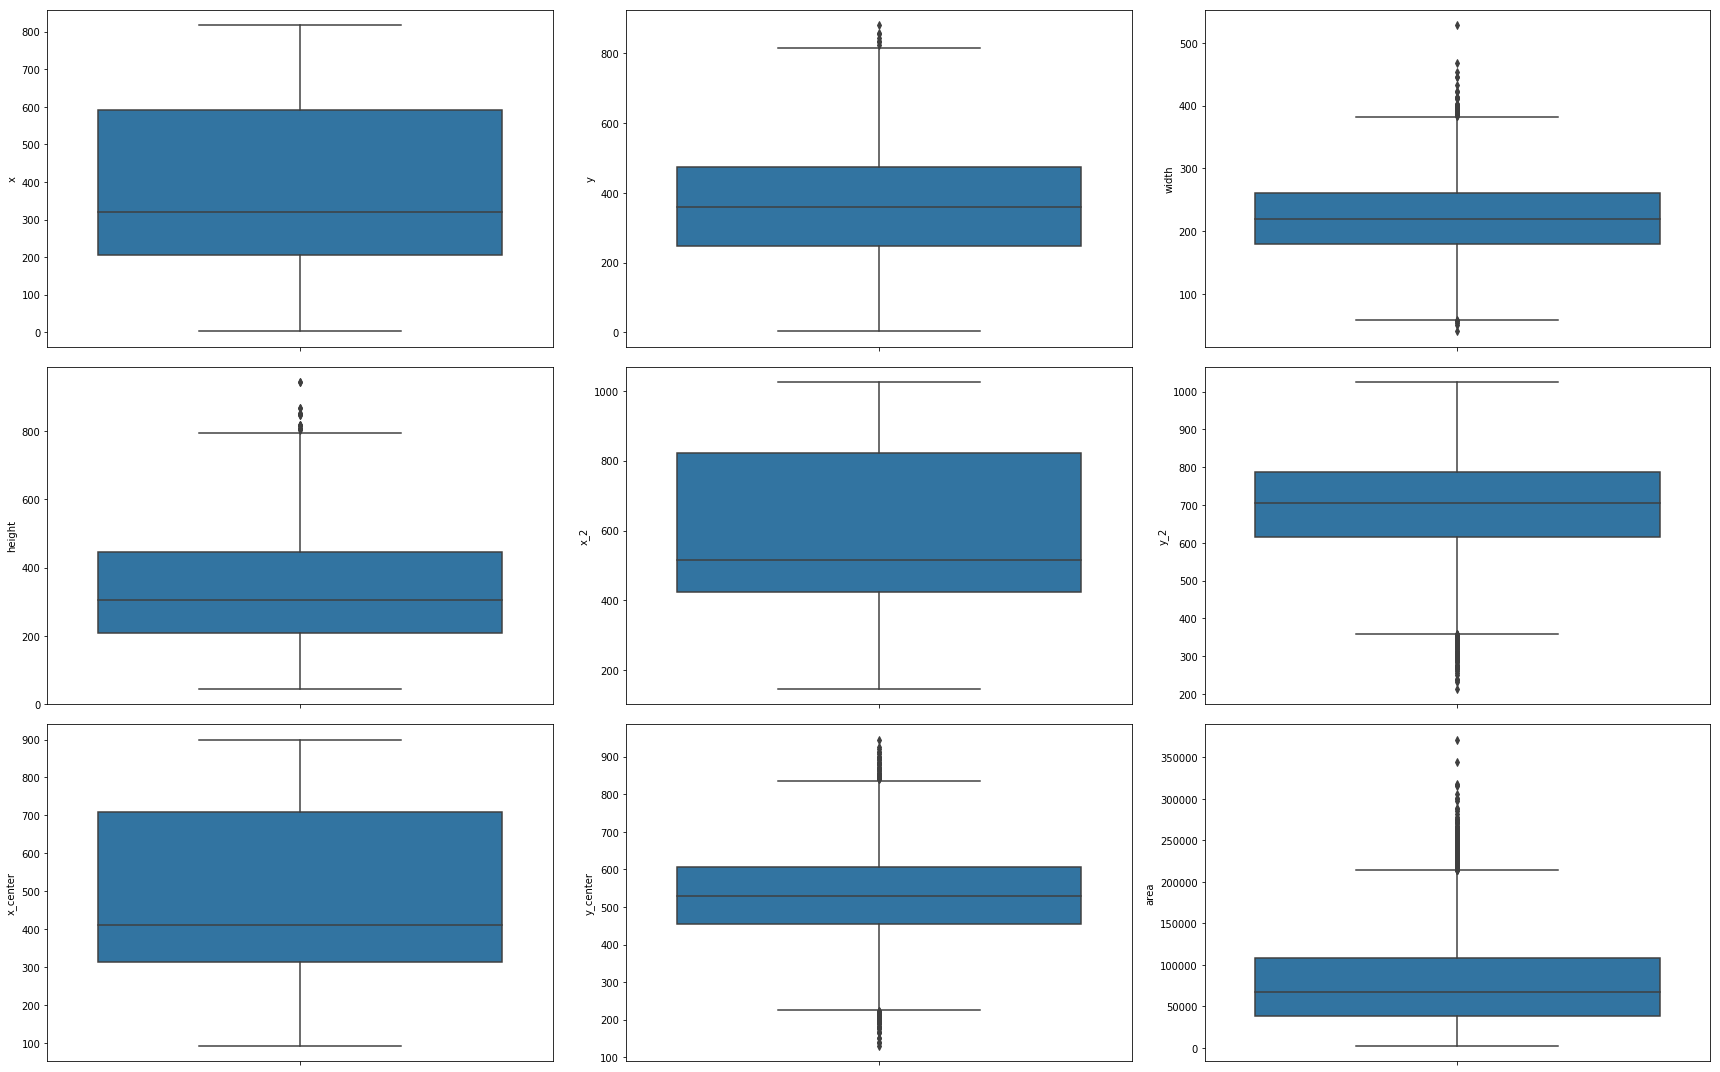

In [20]:
# Analyzing outliers
n_columns = 3
n_rows = 3
_, axes = plt.subplots(n_rows, n_columns, figsize=(8 * n_columns, 5 * n_rows))
for i, c in enumerate(df_areas.columns):
    sns.boxplot(y = c, data = df_areas, ax = axes[i // n_columns, i % n_columns])
plt.tight_layout()
plt.show()

Dropping width/height outlier rows

In [21]:
df_areas[df_areas['width'] > 500]

x      y  width  height    x_2    y_2  x_center  y_center      area
928  226.0  189.0  528.0   703.0  754.0  892.0     490.0     540.5  371184.0

In [22]:
pid_width = list(df[df['width'] > 500]['patientId'].values)
df[df['patientId'].isin(pid_width)]

patientId         class      x      y  width  \
928  097788d4-cb88-4457-8e71-0ca7a3da2216  Lung Opacity  226.0  189.0  528.0   

     height  Target  
928   703.0       1

In [23]:
df_areas[df_areas['height'] > 900].shape[0]

2

In [24]:
pid_height = list(df[df['height'] > 900]['patientId'].values)
df[df['patientId'].isin(pid_height)]

patientId         class      x      y  width  \
5791  3ca6661a-ffbd-4d4d-b49b-c96cfd218307  Lung Opacity   87.0  104.0  310.0   
5792  3ca6661a-ffbd-4d4d-b49b-c96cfd218307  Lung Opacity  549.0   82.0  280.0   
6185  3e62e51c-befb-4a66-b28e-fc469b19e4a8  Lung Opacity  148.0   87.0  366.0   
6186  3e62e51c-befb-4a66-b28e-fc469b19e4a8  Lung Opacity  620.0   82.0  335.0   

      height  Target  
5791   793.0       1  
5792   942.0       1  
6185   867.0       1  
6186   942.0       1

In [25]:
df = df[~df['patientId'].isin(pid_width + pid_height)]
df.shape

(28984, 7)